# Charting a Marketing Acquisition Funnel
---
The motiviation was duplicating some of Looker's bar charts when the data itself was not yet in Looker but still needed to be reported

In [1]:
%matplotlib inline

import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# start with some dummy data
df = pd.DataFrame({
    'date':['2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01'],
    'website_traffic':[330771,358652,407319,395589,397580,415680,483755,581999],
    'new_accounts':[15720,15900,16999,17780,16568,18203,22763,32579],
    'account_verify':[14670,14884,15841,16141,15267,16344,20653,29365],
    'product_activated':[13812,13909,14988,15212,14314,15285,19498,27962],
    'paid_conversion':[1005,1011,9244,1083,1051,1151,1560,2173],
    'some_other_metric':[13270,13678,14732,15023,14092,15060,19086,26436]
})
df.head()

,date,website_traffic,new_accounts,account_verify,product_activated,paid_conversion,some_other_metric
0,2019-08-01,330771,15720,14670,13812,1005,13270
1,2019-09-01,358652,15900,14884,13909,1011,13678
2,2019-10-01,407319,16999,15841,14988,9244,14732
3,2019-11-01,395589,17780,16141,15212,1083,15023
4,2019-12-01,397580,16568,15267,14314,1051,14092


In [4]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8 non-null      datetime64[ns]
 1   website_traffic    8 non-null      int64         
 2   new_accounts       8 non-null      int64         
 3   account_verify     8 non-null      int64         
 4   product_activated  8 non-null      int64         
 5   paid_conversion    8 non-null      int64         
 6   some_other_metric  8 non-null      int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 576.0 bytes


In [6]:
# define only the KPIs we want to see (since there are cases where other metrics are present in the dataframe)
all_kpis = ['website_traffic','new_accounts','account_verify','product_activated','paid_conversion']

In [7]:
all_names = tuple([x.replace('_','\n').title() for x in all_kpis])

In [8]:
def get_it_in_order(df,mask,month):
    """
    Biggest assumption: there is a 'date' column (not index!) in the dataframe that is *literally named* 'date'
    Accepts entire dataframe
    Supply a column mask
    Supply a list of column names
    """
    kpis = OrderedDict()
    frame_2_dict = df.set_index('date').loc[month,idx[mask]].to_dict()
    for i in mask:
        kpis[i] = frame_2_dict[i]
    return kpis

In [9]:
def add_arrow(x_adjust,y_adjust,ratio):
    bbox_props = dict(boxstyle="rarrow,pad=0.5", facecolor="grey", edgecolor="grey", alpha=0.75, lw=1)
    return plt.text(x_adjust,y_adjust,'{0:.1f}%'.format(ratio * 100),
            verticalalignment='center',
            horizontalalignment='left',
            fontsize=16,
            weight='black',
            color='white',
            bbox=bbox_props)

In [10]:
def plot_acquisition_funnel(df, month, names, metrics):
    data = get_it_in_order(df, metrics, month)
    count = range(len(data))
    fig, ax = plt.subplots(figsize=(10, 6))
    rects = ax.bar(count, data.values(), width=.5, align='center', color=sns.color_palette("Blues", len(data)))
    plt.xticks(count, names)
    plt.ylim(bottom=0, top=data[metrics[1]]*2)
    plt.title('{0} Acquisition Funnel'.format(month), fontsize=16)
    plt.tick_params(labelsize=16)
    add_arrow(0.27, data[metrics[3]]/1.7, data[metrics[1]]/data[metrics[0]])
    add_arrow(1.27, data[metrics[3]]/1.7, data[metrics[2]]/data[metrics[1]])
    add_arrow(2.27, data[metrics[3]]/1.7, data[metrics[3]]/data[metrics[2]])
    add_arrow(3.27, data[metrics[3]]/1.7, data[metrics[4]]/data[metrics[3]])
    for rect, val in zip(rects,data.values()):
        height = rect.get_height()
        if height > 250:
            label_color = 'grey'
        else:
            label_color = 'white'
        ax.text(rect.get_x() + rect.get_width()/2,250,'{:,}'.format(val),ha='center', va='bottom',fontsize=12,weight='bold',color=label_color)
    plt.grid(False)
    plt.show()

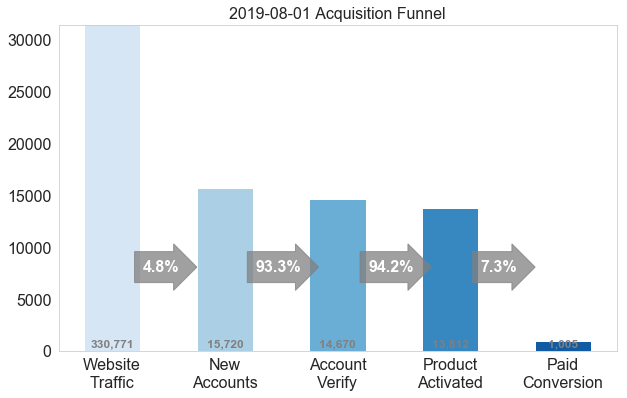

In [11]:
plot_acquisition_funnel(df,'2019-08-01',all_names,all_kpis)